In [2]:
%load_ext autoreload
%autoreload 2

from repo import *
import numpy as np
import seaborn as sns
from sklearn.metrics import roc_curve, auc
import utils as u

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
# get the file names
#train_files, test_files = train_test_all_ids('/data/home/shruti/voxceleb/vgg/leaders/')


# get the file names
train_files, test_files = u.train_test_half_vids('/data/home/shruti/voxceleb/vgg/leaders/')
all_lbls = list(train_files.keys())
all_lbls.sort()
all_lbls = np.array(all_lbls)


before 4105
after 3739


In [50]:
# this experiment will demonstrate
# 1) how much same context instances we need to saturate the distance measure. 

def get_repo_size_dist(all_id, in_id, in_size_rng):
    
    out_result = np.zeros((len(in_size_rng), 5)) # number of instances, mean test dist, min, max, std test dist
    
    fab_repo = Repo('/data/home/shruti/voxceleb/fabnet_metric/', frames=1, step=1, 
                        pool_func=np.mean, N_per_id=-1)
    fab_repo.add_ids({in_id: train_files[in_id]}, 0, 1)
    fab_repo.build_repo_noKDD()
    actual_emb = fab_repo.emb.copy()
    idx = np.arange(len(actual_emb), dtype=np.int32)
    np.random.seed(0)
    
    for i in range(len(in_size_rng)):
        
        # sample the points from the emb to be used
        cur_id = np.random.choice(idx, in_size_rng[i])
        fab_repo.emb = actual_emb[cur_id, :].copy()
        
        fab_result = fab_repo.dist_using_dict({in_id: test_files['real'][in_id]}, 0, 1, parallel=True, dist='cosine')
        
        out_result[i, 0] = in_size_rng[i]
        out_result[i, 1:] = [np.mean(np.array(fab_result['dist'])), 
                            np.min(np.array(fab_result['dist'])),
                           np.max(np.array(fab_result['dist'])),
                           np.median(np.array(fab_result['dist']))]
    out_df = pd.DataFrame(data=out_result, columns=['size', 'mean_dist', 'min_dist', 'max_dist', 'median_dist'])
    out_df['Name'] = in_id
    return out_df

In [51]:

full_df = {}
size_rng = (5000*np.logspace(-3, 0, 20)).astype(np.int32) # 1 to 5000 in logspace
for i in ['bo','br','bs','cb','ew','hc','kh','pb']:
    
    full_df[i] = get_repo_size_dist(i, size_rng)


Number of labels 1
Build repo time: 8.160


[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:   20.1s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:   29.3s
[Parallel(n_jobs=16)]: Done 217 out of 217 | elapsed:   31.7s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    1.0s
[Parallel(n_jobs=16)]: Done 217 out of 217 | elapsed:    4.0s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done 217 out of 217 | elapsed:    3.4s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done 217 out of 217 | elapsed:    3.5s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.8s
[Parallel(n_jobs=16)]: Done 217 out of 217 | elapsed:    3.8s finished
[Parallel(n_

Number of labels 1
Build repo time: 2.008


[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  47 out of  47 | elapsed:    1.3s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  16 out of  47 | elapsed:    0.6s remaining:    1.2s
[Parallel(n_jobs=16)]: Done  47 out of  47 | elapsed:    1.9s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  16 out of  47 | elapsed:    0.6s remaining:    1.2s
[Parallel(n_jobs=16)]: Done  47 out of  47 | elapsed:    1.8s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  47 out of  47 | elapsed:    1.2s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  47 out of  47 | elapsed:    1.1s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]

Number of labels 1
Build repo time: 2.303


[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  95 out of  95 | elapsed:    1.3s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  64 out of  95 | elapsed:    1.8s remaining:    0.8s
[Parallel(n_jobs=16)]: Done  95 out of  95 | elapsed:    2.1s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  95 out of  95 | elapsed:    2.0s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  95 out of  95 | elapsed:    2.3s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  95 out of  95 | elapsed:    2.1s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  64 out of  95 | elapsed:    1.7s remaining:    0.8s
[Parallel(n_jobs=16)]

Number of labels 1
Build repo time: 2.425


[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  74 out of  74 | elapsed:    1.6s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  74 out of  74 | elapsed:    1.6s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  74 out of  74 | elapsed:    2.1s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  74 out of  74 | elapsed:    1.1s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  74 out of  74 | elapsed:    1.5s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  74 out of  74 | elapsed:    1.6s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  74 out

Number of labels 1
Build repo time: 1.144


[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  29 out of  60 | elapsed:    1.1s remaining:    1.1s
[Parallel(n_jobs=16)]: Done  60 out of  60 | elapsed:    1.4s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  29 out of  60 | elapsed:    1.2s remaining:    1.3s
[Parallel(n_jobs=16)]: Done  60 out of  60 | elapsed:    1.8s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  60 out of  60 | elapsed:    1.0s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  60 out of  60 | elapsed:    0.8s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  60 out of  60 | elapsed:    0.9s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]

Number of labels 1
Build repo time: 1.085


[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  45 out of  45 | elapsed:    0.9s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  14 out of  45 | elapsed:    0.8s remaining:    1.8s
[Parallel(n_jobs=16)]: Done  45 out of  45 | elapsed:    2.4s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  14 out of  45 | elapsed:    0.5s remaining:    1.0s
[Parallel(n_jobs=16)]: Done  45 out of  45 | elapsed:    1.2s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  14 out of  45 | elapsed:    0.4s remaining:    1.0s
[Parallel(n_jobs=16)]: Done  45 out of  45 | elapsed:    1.3s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  14 out of  45 | elapsed:    0.7s remaining:    1.6s
[Parall

Number of labels 1
Build repo time: 1.842


[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   6 out of  37 | elapsed:    0.4s remaining:    1.8s
[Parallel(n_jobs=16)]: Done  37 out of  37 | elapsed:    1.6s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  37 out of  37 | elapsed:    0.9s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  37 out of  37 | elapsed:    0.8s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done   6 out of  37 | elapsed:    0.2s remaining:    1.1s
[Parallel(n_jobs=16)]: Done  37 out of  37 | elapsed:    1.7s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  37 out of  37 | elapsed:    0.6s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]

Number of labels 1
Build repo time: 1.747


[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  46 out of  46 | elapsed:    1.5s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  46 out of  46 | elapsed:    0.9s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  46 out of  46 | elapsed:    0.9s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  15 out of  46 | elapsed:    0.5s remaining:    1.1s
[Parallel(n_jobs=16)]: Done  46 out of  46 | elapsed:    1.4s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  15 out of  46 | elapsed:    0.4s remaining:    0.9s
[Parallel(n_jobs=16)]: Done  46 out of  46 | elapsed:    1.2s finished
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]

In [56]:
u.save_obj(full_df, 'result_csv', 'distVSrepoSize')

In [13]:
full_df = u.load_obj('result_csv', 'distVSrepoSize')

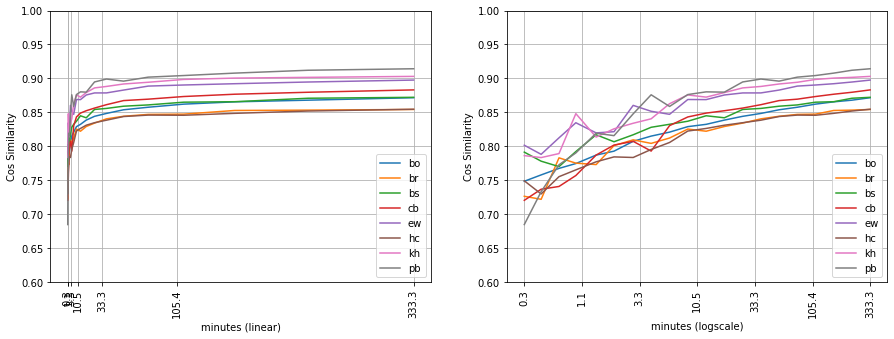

In [22]:

def plot_one_size(in_df, in_id, f_nm, ax):
    
    cur_sz = np.array(in_df['size'])*4/60 # these many seconds
    ax[0].plot(cur_sz, 1-np.array(in_df[f_nm]), label=in_id)
    ax[1].plot(np.log2(cur_sz), 1-np.array(in_df[f_nm]), label=in_id)
    
    # xticks 
    xtck2 = np.linspace(np.log2(cur_sz[0]), np.log2(cur_sz[-1]), 7)
    xtck1 = 2**(xtck2)
    ax[0].set_xticks(xtck1)
    ax[0].set_xticklabels([f'{f:.1f}' for f in xtck1], rotation=90)
    ax[1].set_xticks(xtck2)
    ax[1].set_xticklabels([f'{f:.1f}' for f in xtck1], rotation=90)
    ax[0].grid(b=True)
    ax[1].grid(b=True)    

ldrs = ['bo','br','bs','cb','ew','hc','kh','pb']
_, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

for i in range(len(ldrs)):
    
    plot_one_size(full_df[ldrs[i]], ldrs[i], 'mean_dist', ax)
    
ax[0].set_xlabel('minutes (linear)')
ax[1].set_xlabel('minutes (logscale)')
ax[0].set_ylabel('Cos Similarity')
ax[1].set_ylabel('Cos Similarity')

ax[0].set_ylim([0.6, 1])
ax[1].set_ylim([0.6, 1])
ax[0].legend()
ax[1].legend()
plt.show()

# different context plots

In [4]:
## 2) same person same context vs different person same context vs same person different context vs different person different context
# faceswaps with same context faceid, same context behaveid

# Questions not answered: 
# not sure how to proof there is disentaglement from the face id???
# how to ensure after one hour of video we won't match to any one else

# consider GG data with ids and context dict
cntxt = {'neutral_wall': ['__talking_against_wall'], 
         'laugh': ['__outside_talking_still_laughing', '__outside_talking_pan_laughing'],
         'angry': ['__talking_angry_couch'],
         'happy': ['__podium_speech_happy'],
         'neutral_frnd': ['__kitchen_still', '__kitchen_pan']}

ids = [f'{f+1:02d}' for f in range(28)]                


In [5]:
# read all the emb in a dictionary with context and id as keys
all_emb = {}
bs_fldr = '/data/home/shruti/voxceleb/fabnet_metric/GG_orig'
for i in ids:
    
    all_emb[i] = {}
    for j in cntxt.keys():
        
        #files
        cur_files = [i + f + '.npy' for f in cntxt[j]]
        all_emb[i][j] = []
        for f in cur_files:
            if os.path.exists(os.path.join(bs_fldr, f)):
                X = np.load(os.path.join(bs_fldr, f))
                X = X - np.mean(X, axis=1, keepdims=True)        
                X = X / np.linalg.norm(X, axis=1, keepdims=True) # normalize                
                all_emb[i][j] = all_emb[i][j] + [X]


In [6]:
def get_one_comb_df(id1, id2, cntxt1, cntxt2):
    
    if id1 == id2 and cntxt1==cntxt2:
        if len(all_emb[id1][cntxt1])>1:                
            sim_mat = np.matmul(all_emb[id1][cntxt1][0], all_emb[id1][cntxt1][1].T)
        else:
            return None

    else: 
        if len(all_emb[id1][cntxt1])>0 and len(all_emb[id2][cntxt2])>0:
            sim_mat = np.matmul(all_emb[id1][cntxt1][0], all_emb[id2][cntxt2][-1].T)
        else:
            return None

    cur_max_dist = 1-np.max(sim_mat, axis=0)
    out_df = pd.DataFrame(data=cur_max_dist, columns=['dist'])
    out_df['id1'] = id1
    out_df['id2'] = id2
    out_df['cntxt1'] = cntxt1
    out_df['cntxt2'] = cntxt2
    
    return out_df

cntxt_keys = list(cntxt.keys())

all_df = []
for i in range(len(ids)):
    
    for j in range(i, len(ids)):
        
        for c1 in range(len(cntxt_keys)):
            
            for c2 in range(c1, len(cntxt_keys)):
                
                print(ids[i], ids[j], cntxt_keys[c1], cntxt_keys[c2])
                cur_df = get_one_comb_df(ids[i], ids[j], cntxt_keys[c1], cntxt_keys[c2])
                if cur_df is not None:
                    all_df = all_df + [cur_df]
                    

01 01 neutral_wall neutral_wall
01 01 neutral_wall laugh
01 01 neutral_wall angry
01 01 neutral_wall happy
01 01 neutral_wall neutral_frnd
01 01 laugh laugh
01 01 laugh angry
01 01 laugh happy
01 01 laugh neutral_frnd
01 01 angry angry
01 01 angry happy
01 01 angry neutral_frnd
01 01 happy happy
01 01 happy neutral_frnd
01 01 neutral_frnd neutral_frnd
01 02 neutral_wall neutral_wall
01 02 neutral_wall laugh
01 02 neutral_wall angry
01 02 neutral_wall happy
01 02 neutral_wall neutral_frnd
01 02 laugh laugh
01 02 laugh angry
01 02 laugh happy
01 02 laugh neutral_frnd
01 02 angry angry
01 02 angry happy
01 02 angry neutral_frnd
01 02 happy happy
01 02 happy neutral_frnd
01 02 neutral_frnd neutral_frnd
01 03 neutral_wall neutral_wall
01 03 neutral_wall laugh
01 03 neutral_wall angry
01 03 neutral_wall happy
01 03 neutral_wall neutral_frnd
01 03 laugh laugh
01 03 laugh angry
01 03 laugh happy
01 03 laugh neutral_frnd
01 03 angry angry
01 03 angry happy
01 03 angry neutral_frnd
01 03 happy h

01 27 neutral_wall neutral_wall
01 27 neutral_wall laugh
01 27 neutral_wall angry
01 27 neutral_wall happy
01 27 neutral_wall neutral_frnd
01 27 laugh laugh
01 27 laugh angry
01 27 laugh happy
01 27 laugh neutral_frnd
01 27 angry angry
01 27 angry happy
01 27 angry neutral_frnd
01 27 happy happy
01 27 happy neutral_frnd
01 27 neutral_frnd neutral_frnd
01 28 neutral_wall neutral_wall
01 28 neutral_wall laugh
01 28 neutral_wall angry
01 28 neutral_wall happy
01 28 neutral_wall neutral_frnd
01 28 laugh laugh
01 28 laugh angry
01 28 laugh happy
01 28 laugh neutral_frnd
01 28 angry angry
01 28 angry happy
01 28 angry neutral_frnd
01 28 happy happy
01 28 happy neutral_frnd
01 28 neutral_frnd neutral_frnd
02 02 neutral_wall neutral_wall
02 02 neutral_wall laugh
02 02 neutral_wall angry
02 02 neutral_wall happy
02 02 neutral_wall neutral_frnd
02 02 laugh laugh
02 02 laugh angry
02 02 laugh happy
02 02 laugh neutral_frnd
02 02 angry angry
02 02 angry happy
02 02 angry neutral_frnd
02 02 happy h

02 23 neutral_wall neutral_frnd
02 23 laugh laugh
02 23 laugh angry
02 23 laugh happy
02 23 laugh neutral_frnd
02 23 angry angry
02 23 angry happy
02 23 angry neutral_frnd
02 23 happy happy
02 23 happy neutral_frnd
02 23 neutral_frnd neutral_frnd
02 24 neutral_wall neutral_wall
02 24 neutral_wall laugh
02 24 neutral_wall angry
02 24 neutral_wall happy
02 24 neutral_wall neutral_frnd
02 24 laugh laugh
02 24 laugh angry
02 24 laugh happy
02 24 laugh neutral_frnd
02 24 angry angry
02 24 angry happy
02 24 angry neutral_frnd
02 24 happy happy
02 24 happy neutral_frnd
02 24 neutral_frnd neutral_frnd
02 25 neutral_wall neutral_wall
02 25 neutral_wall laugh
02 25 neutral_wall angry
02 25 neutral_wall happy
02 25 neutral_wall neutral_frnd
02 25 laugh laugh
02 25 laugh angry
02 25 laugh happy
02 25 laugh neutral_frnd
02 25 angry angry
02 25 angry happy
02 25 angry neutral_frnd
02 25 happy happy
02 25 happy neutral_frnd
02 25 neutral_frnd neutral_frnd
02 26 neutral_wall neutral_wall
02 26 neutral

03 22 neutral_frnd neutral_frnd
03 23 neutral_wall neutral_wall
03 23 neutral_wall laugh
03 23 neutral_wall angry
03 23 neutral_wall happy
03 23 neutral_wall neutral_frnd
03 23 laugh laugh
03 23 laugh angry
03 23 laugh happy
03 23 laugh neutral_frnd
03 23 angry angry
03 23 angry happy
03 23 angry neutral_frnd
03 23 happy happy
03 23 happy neutral_frnd
03 23 neutral_frnd neutral_frnd
03 24 neutral_wall neutral_wall
03 24 neutral_wall laugh
03 24 neutral_wall angry
03 24 neutral_wall happy
03 24 neutral_wall neutral_frnd
03 24 laugh laugh
03 24 laugh angry
03 24 laugh happy
03 24 laugh neutral_frnd
03 24 angry angry
03 24 angry happy
03 24 angry neutral_frnd
03 24 happy happy
03 24 happy neutral_frnd
03 24 neutral_frnd neutral_frnd
03 25 neutral_wall neutral_wall
03 25 neutral_wall laugh
03 25 neutral_wall angry
03 25 neutral_wall happy
03 25 neutral_wall neutral_frnd
03 25 laugh laugh
03 25 laugh angry
03 25 laugh happy
03 25 laugh neutral_frnd
03 25 angry angry
03 25 angry happy
03 25 

04 24 laugh angry
04 24 laugh happy
04 24 laugh neutral_frnd
04 24 angry angry
04 24 angry happy
04 24 angry neutral_frnd
04 24 happy happy
04 24 happy neutral_frnd
04 24 neutral_frnd neutral_frnd
04 25 neutral_wall neutral_wall
04 25 neutral_wall laugh
04 25 neutral_wall angry
04 25 neutral_wall happy
04 25 neutral_wall neutral_frnd
04 25 laugh laugh
04 25 laugh angry
04 25 laugh happy
04 25 laugh neutral_frnd
04 25 angry angry
04 25 angry happy
04 25 angry neutral_frnd
04 25 happy happy
04 25 happy neutral_frnd
04 25 neutral_frnd neutral_frnd
04 26 neutral_wall neutral_wall
04 26 neutral_wall laugh
04 26 neutral_wall angry
04 26 neutral_wall happy
04 26 neutral_wall neutral_frnd
04 26 laugh laugh
04 26 laugh angry
04 26 laugh happy
04 26 laugh neutral_frnd
04 26 angry angry
04 26 angry happy
04 26 angry neutral_frnd
04 26 happy happy
04 26 happy neutral_frnd
04 26 neutral_frnd neutral_frnd
04 27 neutral_wall neutral_wall
04 27 neutral_wall laugh
04 27 neutral_wall angry
04 27 neutral

05 26 angry angry
05 26 angry happy
05 26 angry neutral_frnd
05 26 happy happy
05 26 happy neutral_frnd
05 26 neutral_frnd neutral_frnd
05 27 neutral_wall neutral_wall
05 27 neutral_wall laugh
05 27 neutral_wall angry
05 27 neutral_wall happy
05 27 neutral_wall neutral_frnd
05 27 laugh laugh
05 27 laugh angry
05 27 laugh happy
05 27 laugh neutral_frnd
05 27 angry angry
05 27 angry happy
05 27 angry neutral_frnd
05 27 happy happy
05 27 happy neutral_frnd
05 27 neutral_frnd neutral_frnd
05 28 neutral_wall neutral_wall
05 28 neutral_wall laugh
05 28 neutral_wall angry
05 28 neutral_wall happy
05 28 neutral_wall neutral_frnd
05 28 laugh laugh
05 28 laugh angry
05 28 laugh happy
05 28 laugh neutral_frnd
05 28 angry angry
05 28 angry happy
05 28 angry neutral_frnd
05 28 happy happy
05 28 happy neutral_frnd
05 28 neutral_frnd neutral_frnd
06 06 neutral_wall neutral_wall
06 06 neutral_wall laugh
06 06 neutral_wall angry
06 06 neutral_wall happy
06 06 neutral_wall neutral_frnd
06 06 laugh laugh

06 28 neutral_wall neutral_frnd
06 28 laugh laugh
06 28 laugh angry
06 28 laugh happy
06 28 laugh neutral_frnd
06 28 angry angry
06 28 angry happy
06 28 angry neutral_frnd
06 28 happy happy
06 28 happy neutral_frnd
06 28 neutral_frnd neutral_frnd
07 07 neutral_wall neutral_wall
07 07 neutral_wall laugh
07 07 neutral_wall angry
07 07 neutral_wall happy
07 07 neutral_wall neutral_frnd
07 07 laugh laugh
07 07 laugh angry
07 07 laugh happy
07 07 laugh neutral_frnd
07 07 angry angry
07 07 angry happy
07 07 angry neutral_frnd
07 07 happy happy
07 07 happy neutral_frnd
07 07 neutral_frnd neutral_frnd
07 08 neutral_wall neutral_wall
07 08 neutral_wall laugh
07 08 neutral_wall angry
07 08 neutral_wall happy
07 08 neutral_wall neutral_frnd
07 08 laugh laugh
07 08 laugh angry
07 08 laugh happy
07 08 laugh neutral_frnd
07 08 angry angry
07 08 angry happy
07 08 angry neutral_frnd
07 08 happy happy
07 08 happy neutral_frnd
07 08 neutral_frnd neutral_frnd
07 09 neutral_wall neutral_wall
07 09 neutral

08 08 angry neutral_frnd
08 08 happy happy
08 08 happy neutral_frnd
08 08 neutral_frnd neutral_frnd
08 09 neutral_wall neutral_wall
08 09 neutral_wall laugh
08 09 neutral_wall angry
08 09 neutral_wall happy
08 09 neutral_wall neutral_frnd
08 09 laugh laugh
08 09 laugh angry
08 09 laugh happy
08 09 laugh neutral_frnd
08 09 angry angry
08 09 angry happy
08 09 angry neutral_frnd
08 09 happy happy
08 09 happy neutral_frnd
08 09 neutral_frnd neutral_frnd
08 10 neutral_wall neutral_wall
08 10 neutral_wall laugh
08 10 neutral_wall angry
08 10 neutral_wall happy
08 10 neutral_wall neutral_frnd
08 10 laugh laugh
08 10 laugh angry
08 10 laugh happy
08 10 laugh neutral_frnd
08 10 angry angry
08 10 angry happy
08 10 angry neutral_frnd
08 10 happy happy
08 10 happy neutral_frnd
08 10 neutral_frnd neutral_frnd
08 11 neutral_wall neutral_wall
08 11 neutral_wall laugh
08 11 neutral_wall angry
08 11 neutral_wall happy
08 11 neutral_wall neutral_frnd
08 11 laugh laugh
08 11 laugh angry
08 11 laugh happy

09 12 laugh laugh
09 12 laugh angry
09 12 laugh happy
09 12 laugh neutral_frnd
09 12 angry angry
09 12 angry happy
09 12 angry neutral_frnd
09 12 happy happy
09 12 happy neutral_frnd
09 12 neutral_frnd neutral_frnd
09 13 neutral_wall neutral_wall
09 13 neutral_wall laugh
09 13 neutral_wall angry
09 13 neutral_wall happy
09 13 neutral_wall neutral_frnd
09 13 laugh laugh
09 13 laugh angry
09 13 laugh happy
09 13 laugh neutral_frnd
09 13 angry angry
09 13 angry happy
09 13 angry neutral_frnd
09 13 happy happy
09 13 happy neutral_frnd
09 13 neutral_frnd neutral_frnd
09 14 neutral_wall neutral_wall
09 14 neutral_wall laugh
09 14 neutral_wall angry
09 14 neutral_wall happy
09 14 neutral_wall neutral_frnd
09 14 laugh laugh
09 14 laugh angry
09 14 laugh happy
09 14 laugh neutral_frnd
09 14 angry angry
09 14 angry happy
09 14 angry neutral_frnd
09 14 happy happy
09 14 happy neutral_frnd
09 14 neutral_frnd neutral_frnd
09 15 neutral_wall neutral_wall
09 15 neutral_wall laugh
09 15 neutral_wall a

10 18 neutral_wall angry
10 18 neutral_wall happy
10 18 neutral_wall neutral_frnd
10 18 laugh laugh
10 18 laugh angry
10 18 laugh happy
10 18 laugh neutral_frnd
10 18 angry angry
10 18 angry happy
10 18 angry neutral_frnd
10 18 happy happy
10 18 happy neutral_frnd
10 18 neutral_frnd neutral_frnd
10 19 neutral_wall neutral_wall
10 19 neutral_wall laugh
10 19 neutral_wall angry
10 19 neutral_wall happy
10 19 neutral_wall neutral_frnd
10 19 laugh laugh
10 19 laugh angry
10 19 laugh happy
10 19 laugh neutral_frnd
10 19 angry angry
10 19 angry happy
10 19 angry neutral_frnd
10 19 happy happy
10 19 happy neutral_frnd
10 19 neutral_frnd neutral_frnd
10 20 neutral_wall neutral_wall
10 20 neutral_wall laugh
10 20 neutral_wall angry
10 20 neutral_wall happy
10 20 neutral_wall neutral_frnd
10 20 laugh laugh
10 20 laugh angry
10 20 laugh happy
10 20 laugh neutral_frnd
10 20 angry angry
10 20 angry happy
10 20 angry neutral_frnd
10 20 happy happy
10 20 happy neutral_frnd
10 20 neutral_frnd neutral_

11 24 neutral_wall laugh
11 24 neutral_wall angry
11 24 neutral_wall happy
11 24 neutral_wall neutral_frnd
11 24 laugh laugh
11 24 laugh angry
11 24 laugh happy
11 24 laugh neutral_frnd
11 24 angry angry
11 24 angry happy
11 24 angry neutral_frnd
11 24 happy happy
11 24 happy neutral_frnd
11 24 neutral_frnd neutral_frnd
11 25 neutral_wall neutral_wall
11 25 neutral_wall laugh
11 25 neutral_wall angry
11 25 neutral_wall happy
11 25 neutral_wall neutral_frnd
11 25 laugh laugh
11 25 laugh angry
11 25 laugh happy
11 25 laugh neutral_frnd
11 25 angry angry
11 25 angry happy
11 25 angry neutral_frnd
11 25 happy happy
11 25 happy neutral_frnd
11 25 neutral_frnd neutral_frnd
11 26 neutral_wall neutral_wall
11 26 neutral_wall laugh
11 26 neutral_wall angry
11 26 neutral_wall happy
11 26 neutral_wall neutral_frnd
11 26 laugh laugh
11 26 laugh angry
11 26 laugh happy
11 26 laugh neutral_frnd
11 26 angry angry
11 26 angry happy
11 26 angry neutral_frnd
11 26 happy happy
11 26 happy neutral_frnd
11

13 14 laugh angry
13 14 laugh happy
13 14 laugh neutral_frnd
13 14 angry angry
13 14 angry happy
13 14 angry neutral_frnd
13 14 happy happy
13 14 happy neutral_frnd
13 14 neutral_frnd neutral_frnd
13 15 neutral_wall neutral_wall
13 15 neutral_wall laugh
13 15 neutral_wall angry
13 15 neutral_wall happy
13 15 neutral_wall neutral_frnd
13 15 laugh laugh
13 15 laugh angry
13 15 laugh happy
13 15 laugh neutral_frnd
13 15 angry angry
13 15 angry happy
13 15 angry neutral_frnd
13 15 happy happy
13 15 happy neutral_frnd
13 15 neutral_frnd neutral_frnd
13 16 neutral_wall neutral_wall
13 16 neutral_wall laugh
13 16 neutral_wall angry
13 16 neutral_wall happy
13 16 neutral_wall neutral_frnd
13 16 laugh laugh
13 16 laugh angry
13 16 laugh happy
13 16 laugh neutral_frnd
13 16 angry angry
13 16 angry happy
13 16 angry neutral_frnd
13 16 happy happy
13 16 happy neutral_frnd
13 16 neutral_frnd neutral_frnd
13 17 neutral_wall neutral_wall
13 17 neutral_wall laugh
13 17 neutral_wall angry
13 17 neutral

14 24 happy neutral_frnd
14 24 neutral_frnd neutral_frnd
14 25 neutral_wall neutral_wall
14 25 neutral_wall laugh
14 25 neutral_wall angry
14 25 neutral_wall happy
14 25 neutral_wall neutral_frnd
14 25 laugh laugh
14 25 laugh angry
14 25 laugh happy
14 25 laugh neutral_frnd
14 25 angry angry
14 25 angry happy
14 25 angry neutral_frnd
14 25 happy happy
14 25 happy neutral_frnd
14 25 neutral_frnd neutral_frnd
14 26 neutral_wall neutral_wall
14 26 neutral_wall laugh
14 26 neutral_wall angry
14 26 neutral_wall happy
14 26 neutral_wall neutral_frnd
14 26 laugh laugh
14 26 laugh angry
14 26 laugh happy
14 26 laugh neutral_frnd
14 26 angry angry
14 26 angry happy
14 26 angry neutral_frnd
14 26 happy happy
14 26 happy neutral_frnd
14 26 neutral_frnd neutral_frnd
14 27 neutral_wall neutral_wall
14 27 neutral_wall laugh
14 27 neutral_wall angry
14 27 neutral_wall happy
14 27 neutral_wall neutral_frnd
14 27 laugh laugh
14 27 laugh angry
14 27 laugh happy
14 27 laugh neutral_frnd
14 27 angry angry

16 23 neutral_wall laugh
16 23 neutral_wall angry
16 23 neutral_wall happy
16 23 neutral_wall neutral_frnd
16 23 laugh laugh
16 23 laugh angry
16 23 laugh happy
16 23 laugh neutral_frnd
16 23 angry angry
16 23 angry happy
16 23 angry neutral_frnd
16 23 happy happy
16 23 happy neutral_frnd
16 23 neutral_frnd neutral_frnd
16 24 neutral_wall neutral_wall
16 24 neutral_wall laugh
16 24 neutral_wall angry
16 24 neutral_wall happy
16 24 neutral_wall neutral_frnd
16 24 laugh laugh
16 24 laugh angry
16 24 laugh happy
16 24 laugh neutral_frnd
16 24 angry angry
16 24 angry happy
16 24 angry neutral_frnd
16 24 happy happy
16 24 happy neutral_frnd
16 24 neutral_frnd neutral_frnd
16 25 neutral_wall neutral_wall
16 25 neutral_wall laugh
16 25 neutral_wall angry
16 25 neutral_wall happy
16 25 neutral_wall neutral_frnd
16 25 laugh laugh
16 25 laugh angry
16 25 laugh happy
16 25 laugh neutral_frnd
16 25 angry angry
16 25 angry happy
16 25 angry neutral_frnd
16 25 happy happy
16 25 happy neutral_frnd
16

18 27 laugh neutral_frnd
18 27 angry angry
18 27 angry happy
18 27 angry neutral_frnd
18 27 happy happy
18 27 happy neutral_frnd
18 27 neutral_frnd neutral_frnd
18 28 neutral_wall neutral_wall
18 28 neutral_wall laugh
18 28 neutral_wall angry
18 28 neutral_wall happy
18 28 neutral_wall neutral_frnd
18 28 laugh laugh
18 28 laugh angry
18 28 laugh happy
18 28 laugh neutral_frnd
18 28 angry angry
18 28 angry happy
18 28 angry neutral_frnd
18 28 happy happy
18 28 happy neutral_frnd
18 28 neutral_frnd neutral_frnd
19 19 neutral_wall neutral_wall
19 19 neutral_wall laugh
19 19 neutral_wall angry
19 19 neutral_wall happy
19 19 neutral_wall neutral_frnd
19 19 laugh laugh
19 19 laugh angry
19 19 laugh happy
19 19 laugh neutral_frnd
19 19 angry angry
19 19 angry happy
19 19 angry neutral_frnd
19 19 happy happy
19 19 happy neutral_frnd
19 19 neutral_frnd neutral_frnd
19 20 neutral_wall neutral_wall
19 20 neutral_wall laugh
19 20 neutral_wall angry
19 20 neutral_wall happy
19 20 neutral_wall neutr

21 24 neutral_wall angry
21 24 neutral_wall happy
21 24 neutral_wall neutral_frnd
21 24 laugh laugh
21 24 laugh angry
21 24 laugh happy
21 24 laugh neutral_frnd
21 24 angry angry
21 24 angry happy
21 24 angry neutral_frnd
21 24 happy happy
21 24 happy neutral_frnd
21 24 neutral_frnd neutral_frnd
21 25 neutral_wall neutral_wall
21 25 neutral_wall laugh
21 25 neutral_wall angry
21 25 neutral_wall happy
21 25 neutral_wall neutral_frnd
21 25 laugh laugh
21 25 laugh angry
21 25 laugh happy
21 25 laugh neutral_frnd
21 25 angry angry
21 25 angry happy
21 25 angry neutral_frnd
21 25 happy happy
21 25 happy neutral_frnd
21 25 neutral_frnd neutral_frnd
21 26 neutral_wall neutral_wall
21 26 neutral_wall laugh
21 26 neutral_wall angry
21 26 neutral_wall happy
21 26 neutral_wall neutral_frnd
21 26 laugh laugh
21 26 laugh angry
21 26 laugh happy
21 26 laugh neutral_frnd
21 26 angry angry
21 26 angry happy
21 26 angry neutral_frnd
21 26 happy happy
21 26 happy neutral_frnd
21 26 neutral_frnd neutral_

25 28 neutral_wall happy
25 28 neutral_wall neutral_frnd
25 28 laugh laugh
25 28 laugh angry
25 28 laugh happy
25 28 laugh neutral_frnd
25 28 angry angry
25 28 angry happy
25 28 angry neutral_frnd
25 28 happy happy
25 28 happy neutral_frnd
25 28 neutral_frnd neutral_frnd
26 26 neutral_wall neutral_wall
26 26 neutral_wall laugh
26 26 neutral_wall angry
26 26 neutral_wall happy
26 26 neutral_wall neutral_frnd
26 26 laugh laugh
26 26 laugh angry
26 26 laugh happy
26 26 laugh neutral_frnd
26 26 angry angry
26 26 angry happy
26 26 angry neutral_frnd
26 26 happy happy
26 26 happy neutral_frnd
26 26 neutral_frnd neutral_frnd
26 27 neutral_wall neutral_wall
26 27 neutral_wall laugh
26 27 neutral_wall angry
26 27 neutral_wall happy
26 27 neutral_wall neutral_frnd
26 27 laugh laugh
26 27 laugh angry
26 27 laugh happy
26 27 laugh neutral_frnd
26 27 angry angry
26 27 angry happy
26 27 angry neutral_frnd
26 27 happy happy
26 27 happy neutral_frnd
26 27 neutral_frnd neutral_frnd
26 28 neutral_wall n

In [7]:
all_df = pd.concat(all_df, ignore_index=True, sort=False)

In [9]:
all_df.to_csv('ECCV20_figures/fabnet_metric_context.csv')

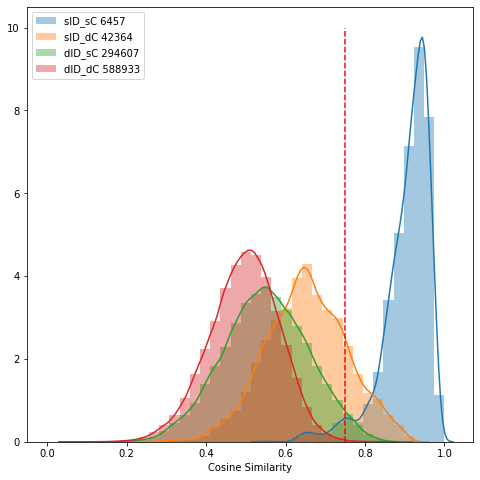

In [8]:
# plot of distance distributions
bins = np.linspace(0,1, 40)

plt.figure(figsize=(8,8))
# same id same context
dist = 1-np.array(all_df[(all_df['id1']==all_df['id2'])&
                    (all_df['cntxt1']==all_df['cntxt2'])]['dist'])
sns.distplot(dist, bins=bins, label=f'sID_sC {len(dist)}')

# same id different context
dist = 1-np.array(all_df[(all_df['id1']==all_df['id2'])&
                    (all_df['cntxt1']!=all_df['cntxt2'])]['dist'])
sns.distplot(dist, bins=bins, label=f'sID_dC {len(dist)}')

# different id same context
dist = 1-np.array(all_df[(all_df['id1']!=all_df['id2'])&
                    (all_df['cntxt1']==all_df['cntxt2'])]['dist'])
sns.distplot(dist, bins=bins, label=f'dID_sC {len(dist)}')

# diff id diff context
dist = 1-np.array(all_df[(all_df['id1']!=all_df['id2'])&
                    (all_df['cntxt1']!=all_df['cntxt2'])]['dist'])
sns.distplot(dist, bins=bins, label=f'dID_dC {len(dist)}')
plt.plot([0.75, 0.75], [0, 10], 'r--')

plt.xlabel('Cosine Similarity')
plt.legend()
plt.show()

# different context plots only fabnet

In [16]:
## 2) same person same context vs different person same context vs same person different context vs different person different context
# faceswaps with same context faceid, same context behaveid

# Questions not answered: 
# not sure how to proof there is disentaglement from the face id???
# how to ensure after one hour of video we won't match to any one else

# consider GG data with ids and context dict
cntxt = {'neutral_wall': ['__talking_against_wall'], 
         'laugh': ['__outside_talking_still_laughing', '__outside_talking_pan_laughing'],
         'angry': ['__talking_angry_couch'],
         'happy': ['__podium_speech_happy'],
         'neutral_frnd': ['__kitchen_still', '__kitchen_pan']}

ids = [f'{f+1:02d}' for f in range(28)]                


In [42]:
# read all the emb in a dictionary with context and id as keys
all_emb = {}
bs_fldr = '/data/home/shruti/voxceleb/fabnet_metric/GG_orig'
for i in ids:
    
    all_emb[i] = {}
    for j in cntxt.keys():
        
        #files
        cur_files = [i + f + '.npy' for f in cntxt[j]]
        all_emb[i][j] = []
        for f in cur_files:
            if os.path.exists(os.path.join(bs_fldr, f)):
                X = np.load(os.path.join(bs_fldr, f))
                #X = X[::5, :].copy()
                X = X - np.mean(X, axis=1, keepdims=True)        
                X = X / np.linalg.norm(X, axis=1, keepdims=True) # normalize                
                all_emb[i][j] = all_emb[i][j] + [X]


In [43]:
def get_one_comb_df(id1, id2, cntxt1, cntxt2):
    
    if id1 == id2 and cntxt1==cntxt2:
        if len(all_emb[id1][cntxt1])>1:                
            sim_mat = np.matmul(all_emb[id1][cntxt1][0], all_emb[id1][cntxt1][1].T)
        else:
            return None

    else: 
        if len(all_emb[id1][cntxt1])>0 and len(all_emb[id2][cntxt2])>0:
            sim_mat = np.matmul(all_emb[id1][cntxt1][0], all_emb[id2][cntxt2][-1].T)
        else:
            return None

    cur_max_dist = 1-np.max(sim_mat, axis=0)
    out_df = pd.DataFrame(data=cur_max_dist, columns=['dist'])
    out_df['id1'] = id1
    out_df['id2'] = id2
    out_df['cntxt1'] = cntxt1
    out_df['cntxt2'] = cntxt2
    
    return out_df

cntxt_keys = list(cntxt.keys())

all_df = []
for i in range(len(ids)):
    
    for j in range(i, len(ids)):
        
        for c1 in range(len(cntxt_keys)):
            
            for c2 in range(c1, len(cntxt_keys)):
                
                print(ids[i], ids[j], cntxt_keys[c1], cntxt_keys[c2])
                cur_df = get_one_comb_df(ids[i], ids[j], cntxt_keys[c1], cntxt_keys[c2])
                if cur_df is not None:
                    all_df = all_df + [cur_df]
                    

01 01 neutral_wall neutral_wall
01 01 neutral_wall laugh
01 01 neutral_wall angry
01 01 neutral_wall happy
01 01 neutral_wall neutral_frnd
01 01 laugh laugh
01 01 laugh angry
01 01 laugh happy
01 01 laugh neutral_frnd
01 01 angry angry
01 01 angry happy
01 01 angry neutral_frnd
01 01 happy happy
01 01 happy neutral_frnd
01 01 neutral_frnd neutral_frnd
01 02 neutral_wall neutral_wall
01 02 neutral_wall laugh
01 02 neutral_wall angry
01 02 neutral_wall happy
01 02 neutral_wall neutral_frnd
01 02 laugh laugh
01 02 laugh angry
01 02 laugh happy
01 02 laugh neutral_frnd
01 02 angry angry
01 02 angry happy
01 02 angry neutral_frnd
01 02 happy happy
01 02 happy neutral_frnd
01 02 neutral_frnd neutral_frnd
01 03 neutral_wall neutral_wall
01 03 neutral_wall laugh
01 03 neutral_wall angry
01 03 neutral_wall happy
01 03 neutral_wall neutral_frnd
01 03 laugh laugh
01 03 laugh angry
01 03 laugh happy
01 03 laugh neutral_frnd
01 03 angry angry
01 03 angry happy
01 03 angry neutral_frnd
01 03 happy h

01 25 angry angry
01 25 angry happy
01 25 angry neutral_frnd
01 25 happy happy
01 25 happy neutral_frnd
01 25 neutral_frnd neutral_frnd
01 26 neutral_wall neutral_wall
01 26 neutral_wall laugh
01 26 neutral_wall angry
01 26 neutral_wall happy
01 26 neutral_wall neutral_frnd
01 26 laugh laugh
01 26 laugh angry
01 26 laugh happy
01 26 laugh neutral_frnd
01 26 angry angry
01 26 angry happy
01 26 angry neutral_frnd
01 26 happy happy
01 26 happy neutral_frnd
01 26 neutral_frnd neutral_frnd
01 27 neutral_wall neutral_wall
01 27 neutral_wall laugh
01 27 neutral_wall angry
01 27 neutral_wall happy
01 27 neutral_wall neutral_frnd
01 27 laugh laugh
01 27 laugh angry
01 27 laugh happy
01 27 laugh neutral_frnd
01 27 angry angry
01 27 angry happy
01 27 angry neutral_frnd
01 27 happy happy
01 27 happy neutral_frnd
01 27 neutral_frnd neutral_frnd
01 28 neutral_wall neutral_wall
01 28 neutral_wall laugh
01 28 neutral_wall angry
01 28 neutral_wall happy
01 28 neutral_wall neutral_frnd
01 28 laugh laugh

02 22 neutral_frnd neutral_frnd
02 23 neutral_wall neutral_wall
02 23 neutral_wall laugh
02 23 neutral_wall angry
02 23 neutral_wall happy
02 23 neutral_wall neutral_frnd
02 23 laugh laugh
02 23 laugh angry
02 23 laugh happy
02 23 laugh neutral_frnd
02 23 angry angry
02 23 angry happy
02 23 angry neutral_frnd
02 23 happy happy
02 23 happy neutral_frnd
02 23 neutral_frnd neutral_frnd
02 24 neutral_wall neutral_wall
02 24 neutral_wall laugh
02 24 neutral_wall angry
02 24 neutral_wall happy
02 24 neutral_wall neutral_frnd
02 24 laugh laugh
02 24 laugh angry
02 24 laugh happy
02 24 laugh neutral_frnd
02 24 angry angry
02 24 angry happy
02 24 angry neutral_frnd
02 24 happy happy
02 24 happy neutral_frnd
02 24 neutral_frnd neutral_frnd
02 25 neutral_wall neutral_wall
02 25 neutral_wall laugh
02 25 neutral_wall angry
02 25 neutral_wall happy
02 25 neutral_wall neutral_frnd
02 25 laugh laugh
02 25 laugh angry
02 25 laugh happy
02 25 laugh neutral_frnd
02 25 angry angry
02 25 angry happy
02 25 

03 20 angry happy
03 20 angry neutral_frnd
03 20 happy happy
03 20 happy neutral_frnd
03 20 neutral_frnd neutral_frnd
03 21 neutral_wall neutral_wall
03 21 neutral_wall laugh
03 21 neutral_wall angry
03 21 neutral_wall happy
03 21 neutral_wall neutral_frnd
03 21 laugh laugh
03 21 laugh angry
03 21 laugh happy
03 21 laugh neutral_frnd
03 21 angry angry
03 21 angry happy
03 21 angry neutral_frnd
03 21 happy happy
03 21 happy neutral_frnd
03 21 neutral_frnd neutral_frnd
03 22 neutral_wall neutral_wall
03 22 neutral_wall laugh
03 22 neutral_wall angry
03 22 neutral_wall happy
03 22 neutral_wall neutral_frnd
03 22 laugh laugh
03 22 laugh angry
03 22 laugh happy
03 22 laugh neutral_frnd
03 22 angry angry
03 22 angry happy
03 22 angry neutral_frnd
03 22 happy happy
03 22 happy neutral_frnd
03 22 neutral_frnd neutral_frnd
03 23 neutral_wall neutral_wall
03 23 neutral_wall laugh
03 23 neutral_wall angry
03 23 neutral_wall happy
03 23 neutral_wall neutral_frnd
03 23 laugh laugh
03 23 laugh angry

04 19 angry angry
04 19 angry happy
04 19 angry neutral_frnd
04 19 happy happy
04 19 happy neutral_frnd
04 19 neutral_frnd neutral_frnd
04 20 neutral_wall neutral_wall
04 20 neutral_wall laugh
04 20 neutral_wall angry
04 20 neutral_wall happy
04 20 neutral_wall neutral_frnd
04 20 laugh laugh
04 20 laugh angry
04 20 laugh happy
04 20 laugh neutral_frnd
04 20 angry angry
04 20 angry happy
04 20 angry neutral_frnd
04 20 happy happy
04 20 happy neutral_frnd
04 20 neutral_frnd neutral_frnd
04 21 neutral_wall neutral_wall
04 21 neutral_wall laugh
04 21 neutral_wall angry
04 21 neutral_wall happy
04 21 neutral_wall neutral_frnd
04 21 laugh laugh
04 21 laugh angry
04 21 laugh happy
04 21 laugh neutral_frnd
04 21 angry angry
04 21 angry happy
04 21 angry neutral_frnd
04 21 happy happy
04 21 happy neutral_frnd
04 21 neutral_frnd neutral_frnd
04 22 neutral_wall neutral_wall
04 22 neutral_wall laugh
04 22 neutral_wall angry
04 22 neutral_wall happy
04 22 neutral_wall neutral_frnd
04 22 laugh laugh

05 19 neutral_frnd neutral_frnd
05 20 neutral_wall neutral_wall
05 20 neutral_wall laugh
05 20 neutral_wall angry
05 20 neutral_wall happy
05 20 neutral_wall neutral_frnd
05 20 laugh laugh
05 20 laugh angry
05 20 laugh happy
05 20 laugh neutral_frnd
05 20 angry angry
05 20 angry happy
05 20 angry neutral_frnd
05 20 happy happy
05 20 happy neutral_frnd
05 20 neutral_frnd neutral_frnd
05 21 neutral_wall neutral_wall
05 21 neutral_wall laugh
05 21 neutral_wall angry
05 21 neutral_wall happy
05 21 neutral_wall neutral_frnd
05 21 laugh laugh
05 21 laugh angry
05 21 laugh happy
05 21 laugh neutral_frnd
05 21 angry angry
05 21 angry happy
05 21 angry neutral_frnd
05 21 happy happy
05 21 happy neutral_frnd
05 21 neutral_frnd neutral_frnd
05 22 neutral_wall neutral_wall
05 22 neutral_wall laugh
05 22 neutral_wall angry
05 22 neutral_wall happy
05 22 neutral_wall neutral_frnd
05 22 laugh laugh
05 22 laugh angry
05 22 laugh happy
05 22 laugh neutral_frnd
05 22 angry angry
05 22 angry happy
05 22 

06 21 neutral_wall neutral_wall
06 21 neutral_wall laugh
06 21 neutral_wall angry
06 21 neutral_wall happy
06 21 neutral_wall neutral_frnd
06 21 laugh laugh
06 21 laugh angry
06 21 laugh happy
06 21 laugh neutral_frnd
06 21 angry angry
06 21 angry happy
06 21 angry neutral_frnd
06 21 happy happy
06 21 happy neutral_frnd
06 21 neutral_frnd neutral_frnd
06 22 neutral_wall neutral_wall
06 22 neutral_wall laugh
06 22 neutral_wall angry
06 22 neutral_wall happy
06 22 neutral_wall neutral_frnd
06 22 laugh laugh
06 22 laugh angry
06 22 laugh happy
06 22 laugh neutral_frnd
06 22 angry angry
06 22 angry happy
06 22 angry neutral_frnd
06 22 happy happy
06 22 happy neutral_frnd
06 22 neutral_frnd neutral_frnd
06 23 neutral_wall neutral_wall
06 23 neutral_wall laugh
06 23 neutral_wall angry
06 23 neutral_wall happy
06 23 neutral_wall neutral_frnd
06 23 laugh laugh
06 23 laugh angry
06 23 laugh happy
06 23 laugh neutral_frnd
06 23 angry angry
06 23 angry happy
06 23 angry neutral_frnd
06 23 happy h

07 23 neutral_wall happy
07 23 neutral_wall neutral_frnd
07 23 laugh laugh
07 23 laugh angry
07 23 laugh happy
07 23 laugh neutral_frnd
07 23 angry angry
07 23 angry happy
07 23 angry neutral_frnd
07 23 happy happy
07 23 happy neutral_frnd
07 23 neutral_frnd neutral_frnd
07 24 neutral_wall neutral_wall
07 24 neutral_wall laugh
07 24 neutral_wall angry
07 24 neutral_wall happy
07 24 neutral_wall neutral_frnd
07 24 laugh laugh
07 24 laugh angry
07 24 laugh happy
07 24 laugh neutral_frnd
07 24 angry angry
07 24 angry happy
07 24 angry neutral_frnd
07 24 happy happy
07 24 happy neutral_frnd
07 24 neutral_frnd neutral_frnd
07 25 neutral_wall neutral_wall
07 25 neutral_wall laugh
07 25 neutral_wall angry
07 25 neutral_wall happy
07 25 neutral_wall neutral_frnd
07 25 laugh laugh
07 25 laugh angry
07 25 laugh happy
07 25 laugh neutral_frnd
07 25 angry angry
07 25 angry happy
07 25 angry neutral_frnd
07 25 happy happy
07 25 happy neutral_frnd
07 25 neutral_frnd neutral_frnd
07 26 neutral_wall n

08 26 laugh angry
08 26 laugh happy
08 26 laugh neutral_frnd
08 26 angry angry
08 26 angry happy
08 26 angry neutral_frnd
08 26 happy happy
08 26 happy neutral_frnd
08 26 neutral_frnd neutral_frnd
08 27 neutral_wall neutral_wall
08 27 neutral_wall laugh
08 27 neutral_wall angry
08 27 neutral_wall happy
08 27 neutral_wall neutral_frnd
08 27 laugh laugh
08 27 laugh angry
08 27 laugh happy
08 27 laugh neutral_frnd
08 27 angry angry
08 27 angry happy
08 27 angry neutral_frnd
08 27 happy happy
08 27 happy neutral_frnd
08 27 neutral_frnd neutral_frnd
08 28 neutral_wall neutral_wall
08 28 neutral_wall laugh
08 28 neutral_wall angry
08 28 neutral_wall happy
08 28 neutral_wall neutral_frnd
08 28 laugh laugh
08 28 laugh angry
08 28 laugh happy
08 28 laugh neutral_frnd
08 28 angry angry
08 28 angry happy
08 28 angry neutral_frnd
08 28 happy happy
08 28 happy neutral_frnd
08 28 neutral_frnd neutral_frnd
09 09 neutral_wall neutral_wall
09 09 neutral_wall laugh
09 09 neutral_wall angry
09 09 neutral

10 11 neutral_wall laugh
10 11 neutral_wall angry
10 11 neutral_wall happy
10 11 neutral_wall neutral_frnd
10 11 laugh laugh
10 11 laugh angry
10 11 laugh happy
10 11 laugh neutral_frnd
10 11 angry angry
10 11 angry happy
10 11 angry neutral_frnd
10 11 happy happy
10 11 happy neutral_frnd
10 11 neutral_frnd neutral_frnd
10 12 neutral_wall neutral_wall
10 12 neutral_wall laugh
10 12 neutral_wall angry
10 12 neutral_wall happy
10 12 neutral_wall neutral_frnd
10 12 laugh laugh
10 12 laugh angry
10 12 laugh happy
10 12 laugh neutral_frnd
10 12 angry angry
10 12 angry happy
10 12 angry neutral_frnd
10 12 happy happy
10 12 happy neutral_frnd
10 12 neutral_frnd neutral_frnd
10 13 neutral_wall neutral_wall
10 13 neutral_wall laugh
10 13 neutral_wall angry
10 13 neutral_wall happy
10 13 neutral_wall neutral_frnd
10 13 laugh laugh
10 13 laugh angry
10 13 laugh happy
10 13 laugh neutral_frnd
10 13 angry angry
10 13 angry happy
10 13 angry neutral_frnd
10 13 happy happy
10 13 happy neutral_frnd
10

11 16 angry neutral_frnd
11 16 happy happy
11 16 happy neutral_frnd
11 16 neutral_frnd neutral_frnd
11 17 neutral_wall neutral_wall
11 17 neutral_wall laugh
11 17 neutral_wall angry
11 17 neutral_wall happy
11 17 neutral_wall neutral_frnd
11 17 laugh laugh
11 17 laugh angry
11 17 laugh happy
11 17 laugh neutral_frnd
11 17 angry angry
11 17 angry happy
11 17 angry neutral_frnd
11 17 happy happy
11 17 happy neutral_frnd
11 17 neutral_frnd neutral_frnd
11 18 neutral_wall neutral_wall
11 18 neutral_wall laugh
11 18 neutral_wall angry
11 18 neutral_wall happy
11 18 neutral_wall neutral_frnd
11 18 laugh laugh
11 18 laugh angry
11 18 laugh happy
11 18 laugh neutral_frnd
11 18 angry angry
11 18 angry happy
11 18 angry neutral_frnd
11 18 happy happy
11 18 happy neutral_frnd
11 18 neutral_frnd neutral_frnd
11 19 neutral_wall neutral_wall
11 19 neutral_wall laugh
11 19 neutral_wall angry
11 19 neutral_wall happy
11 19 neutral_wall neutral_frnd
11 19 laugh laugh
11 19 laugh angry
11 19 laugh happy

12 23 angry angry
12 23 angry happy
12 23 angry neutral_frnd
12 23 happy happy
12 23 happy neutral_frnd
12 23 neutral_frnd neutral_frnd
12 24 neutral_wall neutral_wall
12 24 neutral_wall laugh
12 24 neutral_wall angry
12 24 neutral_wall happy
12 24 neutral_wall neutral_frnd
12 24 laugh laugh
12 24 laugh angry
12 24 laugh happy
12 24 laugh neutral_frnd
12 24 angry angry
12 24 angry happy
12 24 angry neutral_frnd
12 24 happy happy
12 24 happy neutral_frnd
12 24 neutral_frnd neutral_frnd
12 25 neutral_wall neutral_wall
12 25 neutral_wall laugh
12 25 neutral_wall angry
12 25 neutral_wall happy
12 25 neutral_wall neutral_frnd
12 25 laugh laugh
12 25 laugh angry
12 25 laugh happy
12 25 laugh neutral_frnd
12 25 angry angry
12 25 angry happy
12 25 angry neutral_frnd
12 25 happy happy
12 25 happy neutral_frnd
12 25 neutral_frnd neutral_frnd
12 26 neutral_wall neutral_wall
12 26 neutral_wall laugh
12 26 neutral_wall angry
12 26 neutral_wall happy
12 26 neutral_wall neutral_frnd
12 26 laugh laugh

14 16 laugh angry
14 16 laugh happy
14 16 laugh neutral_frnd
14 16 angry angry
14 16 angry happy
14 16 angry neutral_frnd
14 16 happy happy
14 16 happy neutral_frnd
14 16 neutral_frnd neutral_frnd
14 17 neutral_wall neutral_wall
14 17 neutral_wall laugh
14 17 neutral_wall angry
14 17 neutral_wall happy
14 17 neutral_wall neutral_frnd
14 17 laugh laugh
14 17 laugh angry
14 17 laugh happy
14 17 laugh neutral_frnd
14 17 angry angry
14 17 angry happy
14 17 angry neutral_frnd
14 17 happy happy
14 17 happy neutral_frnd
14 17 neutral_frnd neutral_frnd
14 18 neutral_wall neutral_wall
14 18 neutral_wall laugh
14 18 neutral_wall angry
14 18 neutral_wall happy
14 18 neutral_wall neutral_frnd
14 18 laugh laugh
14 18 laugh angry
14 18 laugh happy
14 18 laugh neutral_frnd
14 18 angry angry
14 18 angry happy
14 18 angry neutral_frnd
14 18 happy happy
14 18 happy neutral_frnd
14 18 neutral_frnd neutral_frnd
14 19 neutral_wall neutral_wall
14 19 neutral_wall laugh
14 19 neutral_wall angry
14 19 neutral

15 25 angry happy
15 25 angry neutral_frnd
15 25 happy happy
15 25 happy neutral_frnd
15 25 neutral_frnd neutral_frnd
15 26 neutral_wall neutral_wall
15 26 neutral_wall laugh
15 26 neutral_wall angry
15 26 neutral_wall happy
15 26 neutral_wall neutral_frnd
15 26 laugh laugh
15 26 laugh angry
15 26 laugh happy
15 26 laugh neutral_frnd
15 26 angry angry
15 26 angry happy
15 26 angry neutral_frnd
15 26 happy happy
15 26 happy neutral_frnd
15 26 neutral_frnd neutral_frnd
15 27 neutral_wall neutral_wall
15 27 neutral_wall laugh
15 27 neutral_wall angry
15 27 neutral_wall happy
15 27 neutral_wall neutral_frnd
15 27 laugh laugh
15 27 laugh angry
15 27 laugh happy
15 27 laugh neutral_frnd
15 27 angry angry
15 27 angry happy
15 27 angry neutral_frnd
15 27 happy happy
15 27 happy neutral_frnd
15 27 neutral_frnd neutral_frnd
15 28 neutral_wall neutral_wall
15 28 neutral_wall laugh
15 28 neutral_wall angry
15 28 neutral_wall happy
15 28 neutral_wall neutral_frnd
15 28 laugh laugh
15 28 laugh angry

17 24 laugh angry
17 24 laugh happy
17 24 laugh neutral_frnd
17 24 angry angry
17 24 angry happy
17 24 angry neutral_frnd
17 24 happy happy
17 24 happy neutral_frnd
17 24 neutral_frnd neutral_frnd
17 25 neutral_wall neutral_wall
17 25 neutral_wall laugh
17 25 neutral_wall angry
17 25 neutral_wall happy
17 25 neutral_wall neutral_frnd
17 25 laugh laugh
17 25 laugh angry
17 25 laugh happy
17 25 laugh neutral_frnd
17 25 angry angry
17 25 angry happy
17 25 angry neutral_frnd
17 25 happy happy
17 25 happy neutral_frnd
17 25 neutral_frnd neutral_frnd
17 26 neutral_wall neutral_wall
17 26 neutral_wall laugh
17 26 neutral_wall angry
17 26 neutral_wall happy
17 26 neutral_wall neutral_frnd
17 26 laugh laugh
17 26 laugh angry
17 26 laugh happy
17 26 laugh neutral_frnd
17 26 angry angry
17 26 angry happy
17 26 angry neutral_frnd
17 26 happy happy
17 26 happy neutral_frnd
17 26 neutral_frnd neutral_frnd
17 27 neutral_wall neutral_wall
17 27 neutral_wall laugh
17 27 neutral_wall angry
17 27 neutral

19 27 neutral_wall happy
19 27 neutral_wall neutral_frnd
19 27 laugh laugh
19 27 laugh angry
19 27 laugh happy
19 27 laugh neutral_frnd
19 27 angry angry
19 27 angry happy
19 27 angry neutral_frnd
19 27 happy happy
19 27 happy neutral_frnd
19 27 neutral_frnd neutral_frnd
19 28 neutral_wall neutral_wall
19 28 neutral_wall laugh
19 28 neutral_wall angry
19 28 neutral_wall happy
19 28 neutral_wall neutral_frnd
19 28 laugh laugh
19 28 laugh angry
19 28 laugh happy
19 28 laugh neutral_frnd
19 28 angry angry
19 28 angry happy
19 28 angry neutral_frnd
19 28 happy happy
19 28 happy neutral_frnd
19 28 neutral_frnd neutral_frnd
20 20 neutral_wall neutral_wall
20 20 neutral_wall laugh
20 20 neutral_wall angry
20 20 neutral_wall happy
20 20 neutral_wall neutral_frnd
20 20 laugh laugh
20 20 laugh angry
20 20 laugh happy
20 20 laugh neutral_frnd
20 20 angry angry
20 20 angry happy
20 20 angry neutral_frnd
20 20 happy happy
20 20 happy neutral_frnd
20 20 neutral_frnd neutral_frnd
20 21 neutral_wall n

22 27 happy neutral_frnd
22 27 neutral_frnd neutral_frnd
22 28 neutral_wall neutral_wall
22 28 neutral_wall laugh
22 28 neutral_wall angry
22 28 neutral_wall happy
22 28 neutral_wall neutral_frnd
22 28 laugh laugh
22 28 laugh angry
22 28 laugh happy
22 28 laugh neutral_frnd
22 28 angry angry
22 28 angry happy
22 28 angry neutral_frnd
22 28 happy happy
22 28 happy neutral_frnd
22 28 neutral_frnd neutral_frnd
23 23 neutral_wall neutral_wall
23 23 neutral_wall laugh
23 23 neutral_wall angry
23 23 neutral_wall happy
23 23 neutral_wall neutral_frnd
23 23 laugh laugh
23 23 laugh angry
23 23 laugh happy
23 23 laugh neutral_frnd
23 23 angry angry
23 23 angry happy
23 23 angry neutral_frnd
23 23 happy happy
23 23 happy neutral_frnd
23 23 neutral_frnd neutral_frnd
23 24 neutral_wall neutral_wall
23 24 neutral_wall laugh
23 24 neutral_wall angry
23 24 neutral_wall happy
23 24 neutral_wall neutral_frnd
23 24 laugh laugh
23 24 laugh angry
23 24 laugh happy
23 24 laugh neutral_frnd
23 24 angry angry

In [44]:
all_df = pd.concat(all_df, ignore_index=True, sort=False)

In [40]:
all_df.to_csv('ECCV20_figures/only_fabnet_context.csv')

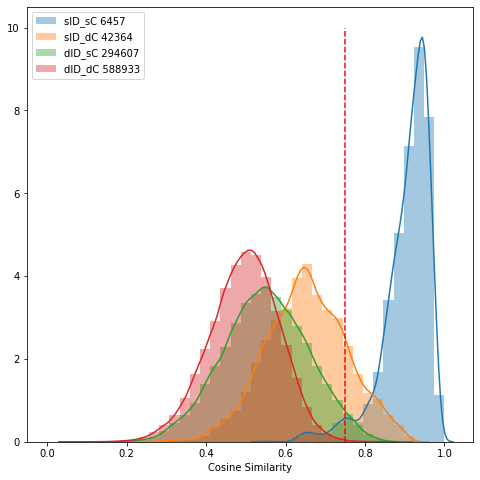

In [45]:
# plot of distance distributions
bins = np.linspace(0,1, 40)

plt.figure(figsize=(8,8))
# same id same context
dist = 1-np.array(all_df[(all_df['id1']==all_df['id2'])&
                    (all_df['cntxt1']==all_df['cntxt2'])]['dist'])
sns.distplot(dist, bins=bins, label=f'sID_sC {len(dist)}')

# same id different context
dist = 1-np.array(all_df[(all_df['id1']==all_df['id2'])&
                    (all_df['cntxt1']!=all_df['cntxt2'])]['dist'])
sns.distplot(dist, bins=bins, label=f'sID_dC {len(dist)}')

# different id same context
dist = 1-np.array(all_df[(all_df['id1']!=all_df['id2'])&
                    (all_df['cntxt1']==all_df['cntxt2'])]['dist'])
sns.distplot(dist, bins=bins, label=f'dID_sC {len(dist)}')

# diff id diff context
dist = 1-np.array(all_df[(all_df['id1']!=all_df['id2'])&
                    (all_df['cntxt1']!=all_df['cntxt2'])]['dist'])
sns.distplot(dist, bins=bins, label=f'dID_dC {len(dist)}')
plt.plot([0.75, 0.75], [0, 10], 'r--')

plt.xlabel('Cosine Similarity')
plt.legend()
plt.show()

## face swap context distributions

In [9]:
fk_files = ['__outside_talking_pan_laughing', '__kitchen_pan']


In [10]:
# all the fake files of kitchen pan and outdoor pan
GG_fake_test_files = u.load_file_names('/data/home/shruti/voxceleb/fabnet_metric/', 'GG_fake', join_bsfldr=False)
GG_fake_test_files = [f for f in GG_fake_test_files if np.any([x in f for x in fk_files])]
GG_fake_test_files

['GG_fake/07_03__kitchen_pan__PWXXULHR.npy',
 'GG_fake/14_18__kitchen_pan__HYMNQ00Q.npy',
 'GG_fake/18_27__kitchen_pan__GRZ07XTD.npy',
 'GG_fake/22_10__outside_talking_pan_laughing__1TXK09OY.npy',
 'GG_fake/16_17__outside_talking_pan_laughing__S7UMSIQV.npy',
 'GG_fake/16_17__outside_talking_pan_laughing__EWJJTZHY.npy',
 'GG_fake/07_02__outside_talking_pan_laughing__1ZE4HC06.npy',
 'GG_fake/13_27__outside_talking_pan_laughing__A1OSUJE9.npy',
 'GG_fake/06_15__kitchen_pan__E98QYYXO.npy',
 'GG_fake/04_12__kitchen_pan__B6YJ9IW1.npy',
 'GG_fake/12_21__outside_talking_pan_laughing__ME7E3R1D.npy',
 'GG_fake/21_12__outside_talking_pan_laughing__ME7E3R1D.npy',
 'GG_fake/10_22__outside_talking_pan_laughing__1TXK09OY.npy',
 'GG_fake/13_12__kitchen_pan__O3SOWBCU.npy',
 'GG_fake/27_13__outside_talking_pan_laughing__A1OSUJE9.npy',
 'GG_fake/17_16__outside_talking_pan_laughing__S7UMSIQV.npy',
 'GG_fake/17_16__outside_talking_pan_laughing__EWJJTZHY.npy',
 'GG_fake/20_26__outside_talking_pan_laughing__2

In [11]:

# for each fake file
# load the feature
# compare the file with orignal of face id (1 is face), behav id (0 is behav) of original
fake_face_dist = {}
fake_behv_dist = {}
for i in range(len(GG_fake_test_files)):
    
    cur_cntxt = 'neutral_frnd'
    if 'laugh' in GG_fake_test_files[i]:
        cur_cntxt = 'laugh'
        
    # load the current file
    fk_feat = np.load(os.path.join('/data/home/shruti/voxceleb/fabnet_metric/', 
                                   GG_fake_test_files[i]))
    fk_feat = fk_feat - np.mean(fk_feat, axis=1, keepdims=True)        
    fk_feat = fk_feat / np.linalg.norm(fk_feat, axis=1, keepdims=True) # normalize
    
    # face id
    face_id = GG_fake_test_files[i].split('/')[-1].split('_')[1]
    if len(all_emb[face_id][cur_cntxt])>0:
        sim_mat = np.matmul(all_emb[face_id][cur_cntxt][0], fk_feat.T)
        fake_face_dist[i] = 1-np.max(sim_mat, axis=0)

    # behavior id
    behav_id = GG_fake_test_files[i].split('/')[-1].split('_')[0]
    if len(all_emb[behav_id][cur_cntxt])>0:
        sim_mat = np.matmul(all_emb[behav_id][cur_cntxt][0], fk_feat.T)
        fake_behv_dist[i] = 1-np.max(sim_mat, axis=0)



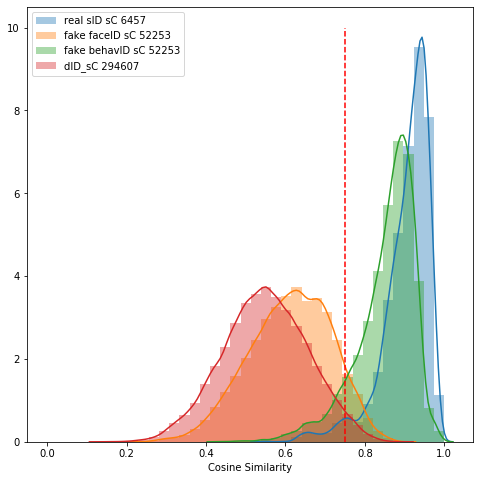

In [12]:
# plot of distance distributions
bins = np.linspace(0,1, 40)

plt.figure(figsize=(8,8))
# same id same context
dist = 1-np.array(all_df[(all_df['id1']==all_df['id2'])&
                    (all_df['cntxt1']==all_df['cntxt2'])]['dist'])
sns.distplot(dist, bins=bins, label=f'real sID sC {len(dist)}')

# fake 
dist = 1-np.concatenate(list(fake_face_dist.values()), axis=0)
sns.distplot(dist, 
             bins=bins, label=f'fake faceID sC {len(dist)}')

# different id same context
dist = 1-np.concatenate(list(fake_behv_dist.values()), axis=0)
sns.distplot(dist, 
             bins=bins, label=f'fake behavID sC {len(dist)}')

# different id same context
dist = 1-np.array(all_df[(all_df['id1']!=all_df['id2'])&
                    (all_df['cntxt1']==all_df['cntxt2'])]['dist'])
sns.distplot(dist, bins=bins, label=f'dID_sC {len(dist)}')

plt.plot([0.75, 0.75], [0, 10], 'r--')
plt.xlabel('Cosine Similarity')
plt.legend()
plt.show()